In [ ]:
#%pip install mlxtend --upgrade

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv
import time

In [ ]:
with open('mashroom.csv') as f:
    reader = csv.reader(f)
    my_list = list(reader)
#print("csv to list:",my_list)

In [ ]:
te = TransactionEncoder()
array = te.fit(my_list).transform(my_list)
df = pd.DataFrame(array, columns=te.columns_)

In [ ]:
df = df.head(3000)
aptime = []
fptime = []
th = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in th:
  start_time = time.time()
  apfrequent = apriori(df, min_support=i)
  end = time.time() - start_time
  aptime.append(end)

  start_time = time.time()
  frequent = fpgrowth(df, min_support=i)
  end = time.time() - start_time
  fptime.append(end)

In [ ]:
print("Time",aptime)
print("Threshold",th)

Time [4.491112232208252, 0.5129847526550293, 0.13723325729370117, 0.06919026374816895, 0.031122922897338867, 0.015355825424194336, 0.008628129959106445]
Threshold [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [ ]:
print("Time",fptime)
print("Threshold",th)

Time [0.2794175148010254, 0.08659887313842773, 0.07379961013793945, 0.05446028709411621, 0.04842114448547363, 0.043360233306884766, 0.037580013275146484]
Threshold [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


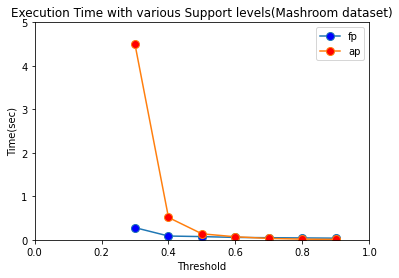

In [ ]:
import matplotlib.pyplot as plt

plt.plot(th, fptime,marker='o', markerfacecolor='blue', markersize=8,  label = "fp")
plt.plot(th, aptime,marker='o', markerfacecolor='red', markersize=8,  label = "ap")
plt.ylim(0,5)
plt.xlim(0,1)
plt.xlabel('Threshold')
plt.ylabel('Time(sec)')
plt.legend()
plt.title('Execution Time with various Support levels(Mashroom dataset)')

plt.show()